In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy import signal
np.set_printoptions(threshold=np.nan) #print the whole arrray


In [11]:
t_inter = 200
n_samp_cos = 10
freq_samp = 1.0/((t_inter*1e-6))
freq_cos = 1.0/((t_inter*1e-6)*n_samp_cos)
print('cosine freq =', freq_cos, 'Hz')
print('sampling freq =', freq_samp, 'Hz')

cosine freq = 500.0 Hz
sampling freq = 5000.0 Hz


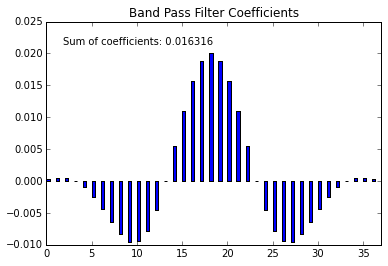

In [12]:
bp_coef = [ 0.000313, 0.000472, 0.000426, -0.000000, -0.000941, 
-0.002438, -0.004382, -0.006499, -0.008370, -0.009499, -0.009417, -0.007804, -0.004587, 0.000000, 0.005424, 0.010927, 0.015665, 0.018868, 0.020000, 0.018868, 
0.015665, 0.010927, 0.005424, 0.000000, -0.004587, 
-0.007804, -0.009417, -0.009499, -0.008370, -0.006499, 
-0.004382, -0.002438, -0.000941, -0.000000, 0.000426, 0.000472, 0.000313] 
#if len(bp_coef) != len(lp_coef):
  #  print('LOW PASS & BAND PASS FILTERS ARE NOT THE SAME LENGTH')
# plot filter coefficients
n_coef = len(bp_coef)
buf = np.zeros(n_coef)
ind = np.arange(n_coef)
fig, ax = plt.subplots()
ax.bar(ind, bp_coef, 0.35)
ax.set_xlim(0,37)
temptext = 'Sum of coefficients: {}'.format(np.sum(bp_coef))
ax.text(0.05, 0.9, temptext, transform = ax.transAxes)
ax.set_title('Band Pass Filter Coefficients');

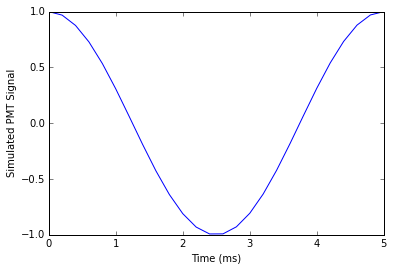

In [13]:
n_total_samples = 1001
time_interrupts = np.linspace(0, n_total_samples*t_inter*1e-3, num=n_total_samples)
test_signal = np.zeros(n_total_samples)
for i in range (n_total_samples):
    test_signal = (np.cos(2*np.pi*time_interrupts*i/freq_samp))

fig, ax = plt.subplots()
ax.plot(time_interrupts, test_signal)
#ax.set_ylim(-2,2)
ax.set_xlim(0,5)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Simulated PMT Signal');

In [14]:
test_signal

array([ 1.        ,  0.96852063,  0.87606441,  0.72845228,  0.53497771,
        0.30782162,  0.06128546, -0.18910915, -0.42759769, -0.63916522,
       -0.8104917 , -0.93079065, -0.99248818, -0.99169991, -0.92847546,
       -0.80679535, -0.63432043, -0.42190948, -0.18293565,  0.06755558,
        0.3137936 ,  0.54027557,  0.73274247,  0.87907682,  0.97006559,
        0.99998026,  0.96693743,  0.87301743,  0.72413334,  0.52965874,
        0.30183748,  0.05501292, -0.19527519, -0.43326902, -0.64398478,
       -0.81415606, -0.9330691 , -0.99323728, -0.99087249, -0.92612361,
       -0.80306715, -0.62945059, -0.41620462, -0.17675492,  0.07382304,
        0.3197532 ,  0.5455521 ,  0.73700372,  0.88205451,  0.97157226,
        0.99992104,  0.96531605,  0.86993597,  0.71978582,  0.52431885,
        0.29584143,  0.0487382 , -0.20143352, -0.43892324, -0.64877891,
       -0.81778827, -0.93531071, -0.99394716, -0.99000594, -0.9237352 ,
       -0.79930725, -0.62455591, -0.41048332, -0.17056722,  0.08

In [24]:
def fir_basic(new_value, h, buf):
    '''Calculate FIR filtered value given filter coefficients, h, and delay line, buf
    
       inputs:
           new_value - latest sample
           h - array of filter coefficients
           buf - array containing previous sample values. Should be equal in length to h
       returns:
           new filtered value'''
    num_coef = len(h)
    buf[0] = new_value
    accum = 0
    for i in range(1, num_coef, 1):
        accum += h[i] * buf[i]
    # shift values to right in z buffer
    for i in range(num_coef-2, -1, -1):
        buf[i+1] = buf[i]
    #print(z, '\n', h)
    return accum

def zero_buf(buf):
    buf = 0.0

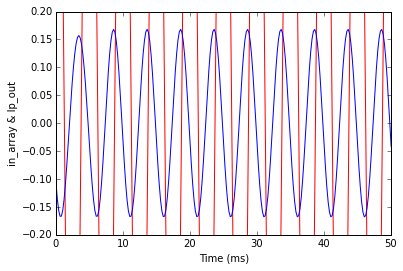

In [33]:
in_array = np.copy(test_signal)
#in_array += 3000
n_pts = len(in_array)
bp_out = np.zeros(n_pts)
zero_buf(buf) 
for i in range(n_pts):
    bp_out[i] = fir_basic(in_array[i], bp_coef,buf)

fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.set_ylim(-.20, .20)
ax.plot(time_interrupts, in_array, 'r')
ax.plot(time_interrupts, bp_out)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('in_array & lp_out');

In [26]:
bp_out


array([ 0.        ,  0.000472  ,  0.00088314, ...,  0.01110174,
       -0.0310408 , -0.07122906])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [7]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

In [8]:
teensy = serial.Serial("/dev/ttyACM0", 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()
temp


[['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', '0.00000'],
 ['0.00', 

NameError: name 'time_interrupts' is not defined

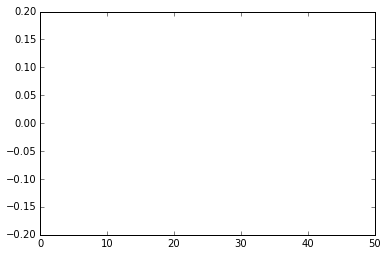

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.set_ylim(-.20, .20)
ax.plot(time_interrupts, in_array, 'r')
ax.plot(time_interrupts, data_temp)

In [44]:
len(time_interrupts)

1001